In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
size = 1000
x = np.random.normal(loc=0, scale=8, size=size)
y = np.random.normal(loc=0, scale=2, size=size)

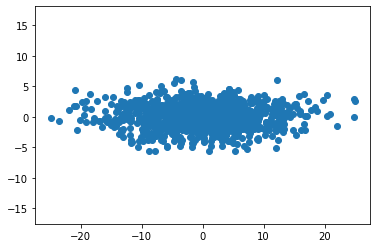

In [47]:
plt.scatter(x, y)
plt.axis('equal')
plt.show()

In [48]:
mean = [0, 0]
cov = [[3, 3], [3, 4]]
size = 500
X = np.random.multivariate_normal(mean=mean, cov=cov, size=size)

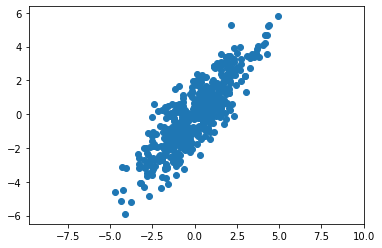

In [49]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [50]:
X

array([[ 1.68530270e+00,  1.87399966e+00],
       [-1.30234809e+00, -2.81441821e+00],
       [ 8.14655831e-01,  1.44237100e+00],
       [-1.84273685e-01,  1.24880224e+00],
       [ 1.28038904e+00, -1.06843432e-01],
       [ 4.28202052e+00,  3.53867830e+00],
       [-2.97724459e+00, -3.14458864e+00],
       [-1.36323954e+00, -7.80025801e-01],
       [-2.73416194e+00, -1.14474781e+00],
       [ 1.38367950e+00,  6.72369916e-01],
       [-2.39662638e+00, -1.76848633e+00],
       [ 2.71717975e+00,  3.24343631e+00],
       [-1.84139863e+00, -2.01932071e+00],
       [-1.34409974e+00, -1.60860087e+00],
       [ 1.57736241e+00,  2.36105886e+00],
       [-5.54122565e-02,  6.72098281e-01],
       [-2.94972826e+00, -3.21675547e+00],
       [ 1.31870274e+00,  3.00276027e+00],
       [-2.51436488e-01,  1.16379936e+00],
       [ 2.87760365e-01, -7.14313716e-01],
       [ 2.34211834e+00,  2.40706715e+00],
       [-2.41490800e+00, -1.88174652e+00],
       [-2.78232485e+00, -2.43557248e+00],
       [-2.

## normalización de los datos

In [51]:
np.mean(X, axis=0), np.std(X, axis=0)

(array([-0.02625283, -0.05691317]), array([1.66680478, 1.96055267]))

In [52]:
X_std = (X - np.mean(X, axis=0))/np.std(X, axis=0)

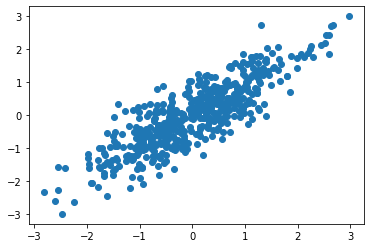

In [53]:
plt.scatter(X_std[:, 0], X_std[:, 1])

# Calculo de la covarianza

In [54]:
X_mean = np.mean(X_std, axis=0)
X_mean

array([3.37507799e-17, 3.55271368e-17])

In [55]:
from IPython.display import display, Math, Latex

display(Math(r'\Sigma = \frac{1}{n-1}((X-\overline{x})^T(X-\overline{x}))'))

<IPython.core.display.Math object>

In [56]:
cov_matrix = (X_std - X_mean).T.dot((X_std - X_mean))/(X_std.shape[0]-1)
cov_matrix

array([[1.00200401, 0.85380963],
       [0.85380963, 1.00200401]])

In [57]:
np.cov(X_std.T)

array([[1.00200401, 0.85380963],
       [0.85380963, 1.00200401]])

In [58]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals, eig_vecs

(array([1.85581363, 0.14819438]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

# Calculo de valores y vectores propios con la matriz de correlación

In [15]:
corr_matrix = np.corrcoef(X_std.T)
corr_matrix

array([[1.        , 0.87789133],
       [0.87789133, 1.        ]])

In [16]:
eig_vals_corr, eig_vecs_corr = np.linalg.eig(corr_matrix)
eig_vals_corr, eig_vecs_corr

(array([0.12210867, 1.87789133]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

# Singular Value Decomposition

In [17]:
u, s, v = np.linalg.svd(X_std.T)
u

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

# Análisis en vectores y valores propios

In [18]:
eig_vals, eig_vecs

(array([0.12235337, 1.88165464]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

Calculando la norma de los vectores propios

In [19]:
np.linalg.norm(eig_vecs[0]), np.linalg.norm(eig_vecs[1])

(0.9999999999999999, 0.9999999999999999)

In [20]:
np.sum(eig_vals)

2.0040080160320635

In [21]:
eig_vals

array([0.12235337, 1.88165464])

In [22]:
total_sum = np.sum(eig_vals)

val_porc_eig_val_1 =  eig_vals[0]/total_sum * 100
val_porc_eig_val_2 =  eig_vals[1]/total_sum * 100
val_porc_eig_val_1, val_porc_eig_val_2

(6.105433347802307, 93.89456665219771)

In [23]:
# ordenando valores y vectores propios de mayor a menor
eig_pairs = [(eig_vals[i], eig_vecs[i]) for i in range(len(eig_vals))]
eig_pairs

[(0.122353373703453, array([-0.70710678, -0.70710678])),
 (1.8816546423286107, array([ 0.70710678, -0.70710678]))]

In [24]:
eig_pairs.sort(reverse=True)
eig_pairs

[(1.8816546423286107, array([ 0.70710678, -0.70710678])),
 (0.122353373703453, array([-0.70710678, -0.70710678]))]

In [25]:
total_sum = np.sum(eig_vals)

porc_eig = [eig_val/total_sum * 100 for eig_val, _ in eig_pairs]
cum_porc_eig = np.cumsum(porc_eig)
porc_eig, cum_porc_eig

([93.89456665219771, 6.105433347802307], array([ 93.89456665, 100.        ]))

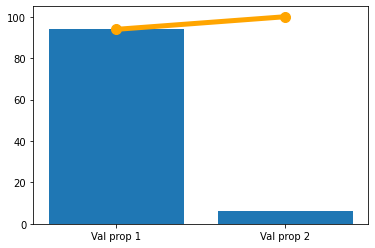

In [26]:
# plots
x = ['Val prop 1', 'Val prop 2']
plt.bar(x, porc_eig)
plt.plot(x, cum_porc_eig, '.-', c='orange', linewidth=5, markersize=20)

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2).fit(X_std)

In [29]:
pca.components_, pca.explained_variance_

(array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.88165464, 0.12235337]))

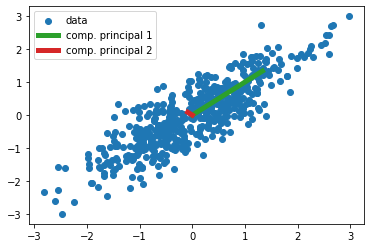

In [60]:
plt.scatter(X_std[:, 0], X_std[:, 1], label='data')

for idx, (eig_val, eig_vec) in enumerate(zip(pca.explained_variance_, pca.components_)):
    plt.plot([0, eig_val*eig_vec[0]], [0, eig_val*eig_vec[1]], 
             color=f"C{idx+2}", label=f'comp. principal {idx+1}', linewidth=5)

plt.legend()